In [1]:
import glob
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics

path ='E:\\marci main\\bme\\hfizlab2\\01amr\\'

1. feladat: Offset feszültség mérése

E:\marci main\bme\hfizlab2\01amr\1.txt


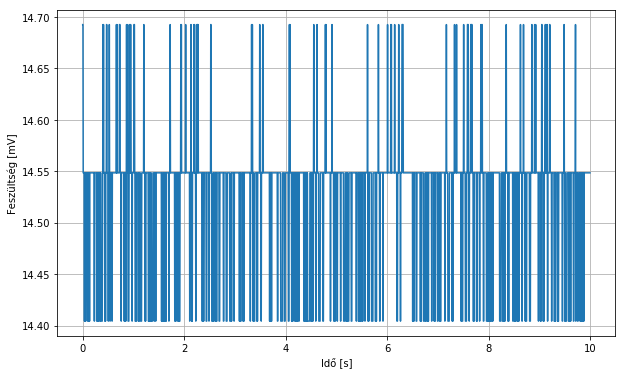

14.52473241531994


In [2]:
j=0
for filename in glob.glob(os.path.join(path, '1*.txt')):
    print(filename)
    i=0
    t = []
    v1 = []
    v2 = []
    v3 = []
    with open(filename) as f:
        j=j+1
        for line in f:
            i=i+1
            if i>7:
                try:
                    t.append(float(line.split("\t")[0]))
                    v1.append(float(line.split("\t")[1]))
                except:
                    print("")

    plt.figure(figsize=(10,6))
    plt.plot(t,v1)
    plt.ylabel("Feszültség [mV]")
    plt.xlabel("Idő [s]")
    plt.grid(True)
    plt.savefig(filename[:-4]+".pdf")
    plt.show()
    
    offset = np.average(v1)
    print(offset)

2. feladat: Térerősség és jel kapcsolata, lineáris közelítés és feltételei

E:\marci main\bme\hfizlab2\01amr\2-05.txt


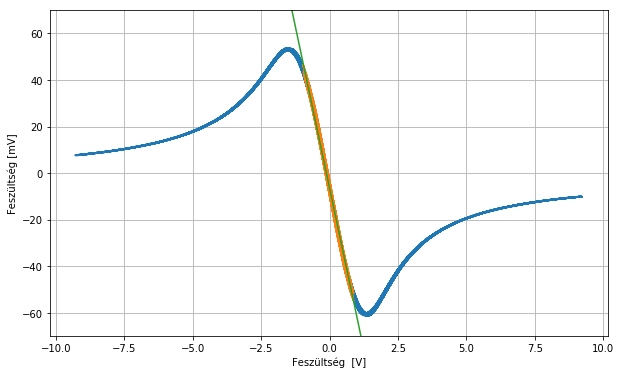

E:\marci main\bme\hfizlab2\01amr\2-10.txt


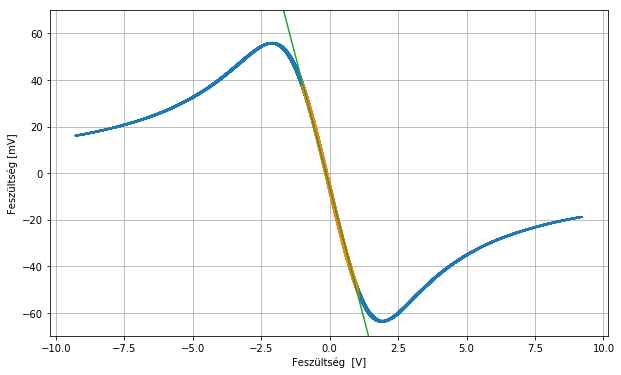

E:\marci main\bme\hfizlab2\01amr\2-15.txt


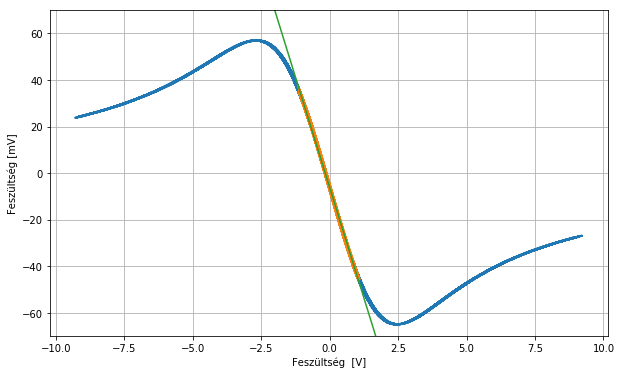

E:\marci main\bme\hfizlab2\01amr\2-20.txt


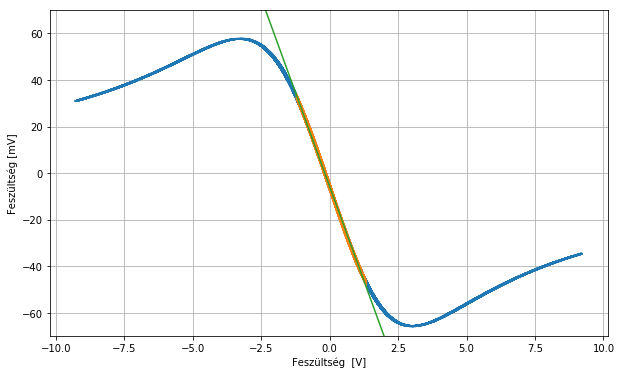

E:\marci main\bme\hfizlab2\01amr\2-25.txt


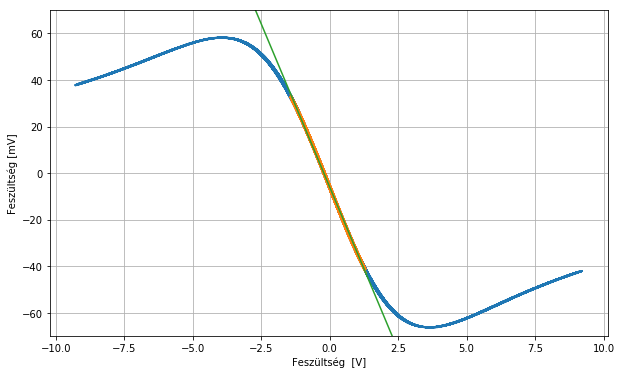

E:\marci main\bme\hfizlab2\01amr\2-30.txt


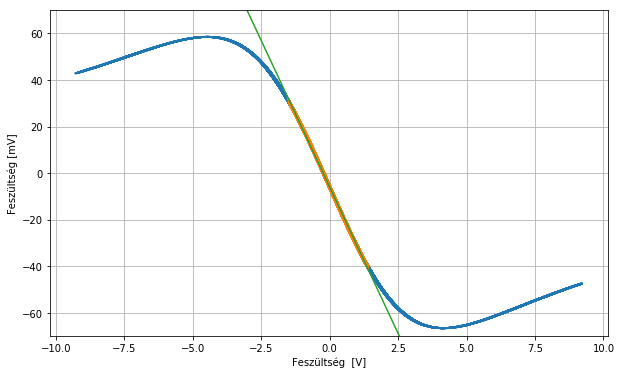

E:\marci main\bme\hfizlab2\01amr\2-35.txt


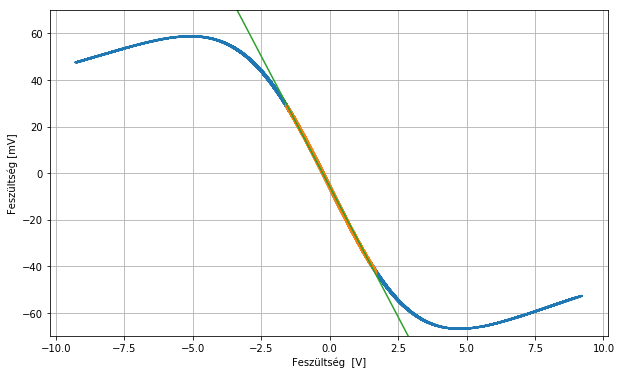

E:\marci main\bme\hfizlab2\01amr\2-40.txt


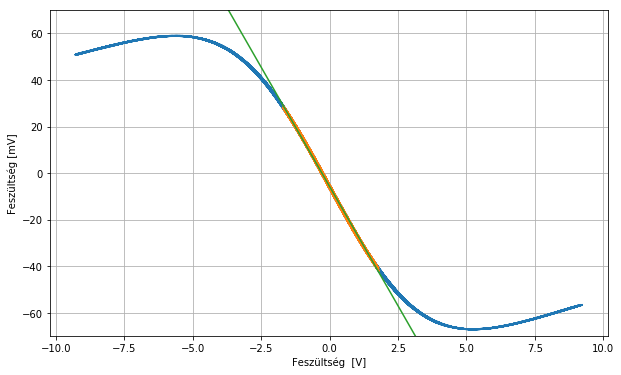

E:\marci main\bme\hfizlab2\01amr\2-45.txt


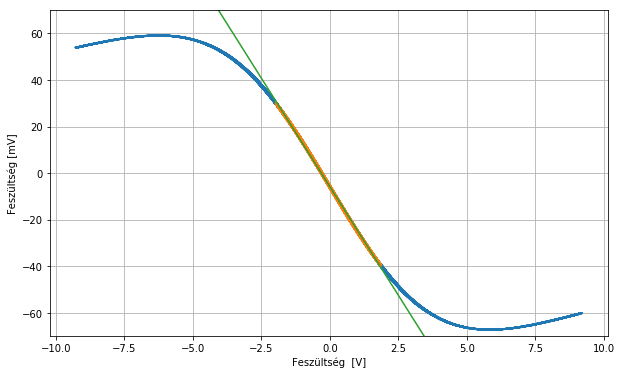

E:\marci main\bme\hfizlab2\01amr\2-50.txt


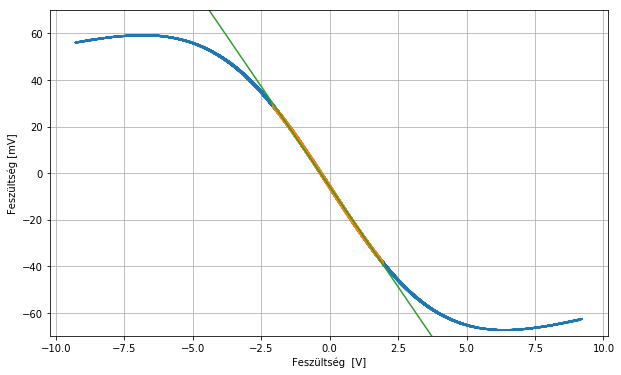

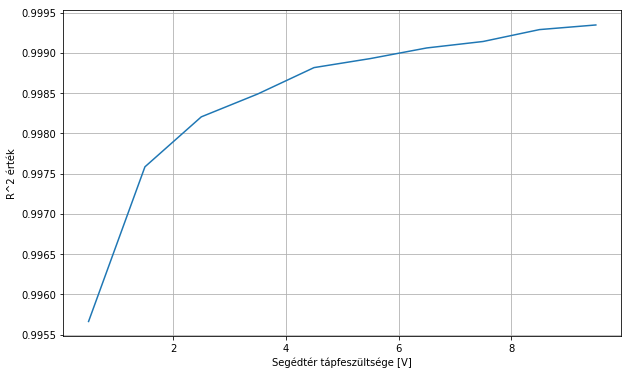

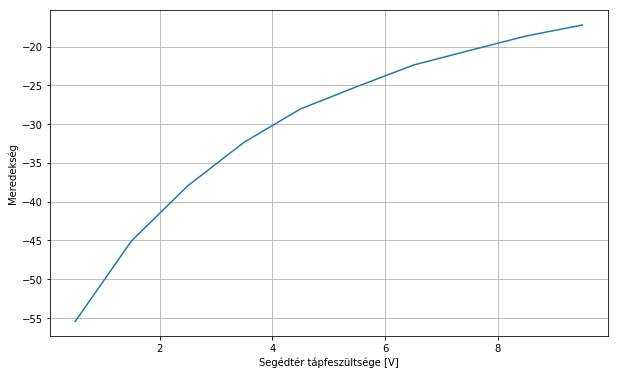

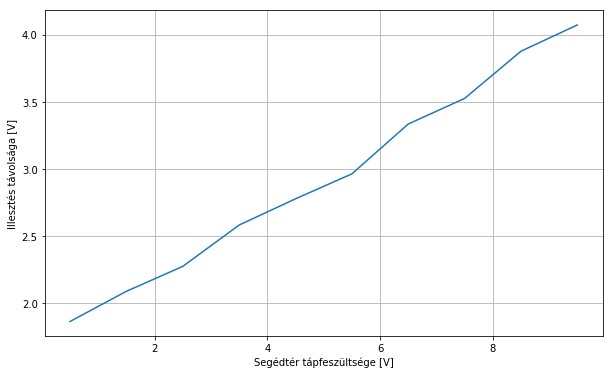

In [6]:
j=0
tap = []
m = []
a = []
b = []
r2s = []
fit_dist = []
for filename in glob.glob(os.path.join(path, '2-*txt')):
    j=j+1
    print(filename)
    i=0
    tap.append(j*0.5)
    t = []
    v1 = []
    v2 = []
    v3 = []
    with open(filename) as f:
        j=j+1
        for line in f:
            i=i+1
            if i>7:
                try:
                    a = float(line.split("\t")[3])
                    #or cut in range(300):
                    #f abs(a)<0.8
                    t.append(float(line.split("\t")[0]))
                    v1.append(float(line.split("\t")[1]))
                    v2.append(float(line.split("\t")[2]))
                    v3.append(float(line.split("\t")[3]))
                except:
                    print("")

    v1 = list(v1 - offset)
    
    plt.figure(figsize=(10,6))
    plt.plot(v3,v1)
    i=0
    prev_r2=0
    prev_a=[]
    for i in range(800):
        #print(i)
        for e in range(10):
            max1 = v3.index(max(v3))
            v3.pop(max1)
            v1.pop(max1)
            min1 = v3.index(min(v3))
            v3.pop(min1)
            v1.pop(min1)
        
        a= stats.linregress(v3,v1)
        r2 = a[2]
        if abs(r2)<prev_r2:
            break
        else:
            prev_a = a
            prev_r2 = abs(r2)
    
    m.append(prev_a[0])
    b.append(prev_a[1])
    r2s.append(abs(prev_a[2]))
    fit_dist.append(max(v3)-min(v3))
    
    plt.plot(v3,v1)
    plt.plot([-5,5],[prev_a[0]*-5+prev_a[1],prev_a[0]*5+prev_a[1]])
    plt.ylabel("Feszültség [mV]")
    plt.xlabel("Feszültség  [V]")
    plt.ylim(-70,70)
    #plt.xlim(-1.70,1.70)
    plt.grid(True)
    plt.savefig(filename[:-4]+".pdf")
    plt.show()

plt.figure(figsize=(10,6))
plt.plot(tap,r2s)
plt.ylabel("R^2 érték")
plt.xlabel("Segédtér tápfeszültsége [V]")
plt.savefig("2-r2.pdf")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(tap,m)
plt.ylabel("Meredekség")
plt.xlabel("Segédtér tápfeszültsége [V]")
plt.savefig("2-m.pdf")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(tap,fit_dist)
plt.ylabel("Illesztés távolsága [V]")
plt.xlabel("Segédtér tápfeszültsége [V]")
plt.savefig("2-fit_dist.pdf")
plt.grid(True)
plt.show()

3. Feladat: 

E:\marci main\bme\hfizlab2\01amr\3-0.txt
-1.62881562882 2.01221001221
3.64102564103


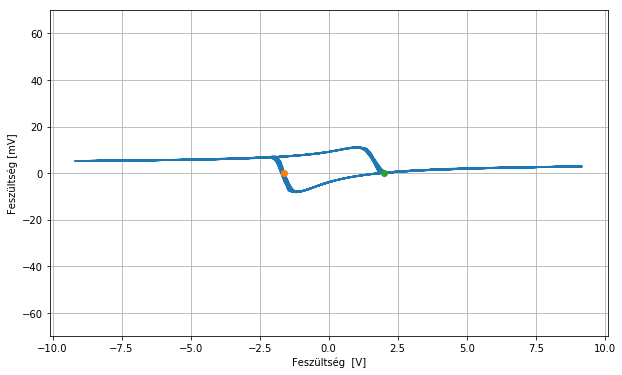

E:\marci main\bme\hfizlab2\01amr\3-05.txt
-0.905982905983 0.901098901099
1.807081807082


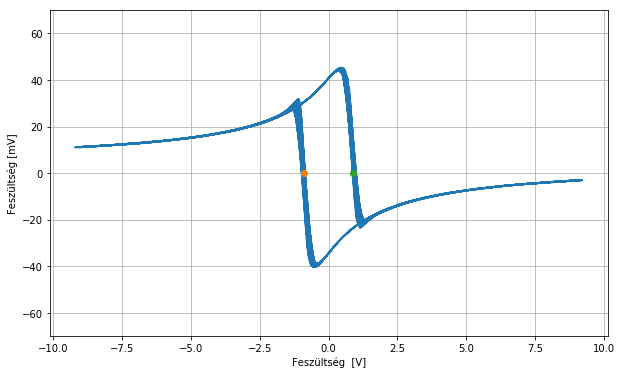

E:\marci main\bme\hfizlab2\01amr\3-10.txt
-0.41514041514 0.368742368742
0.783882783882


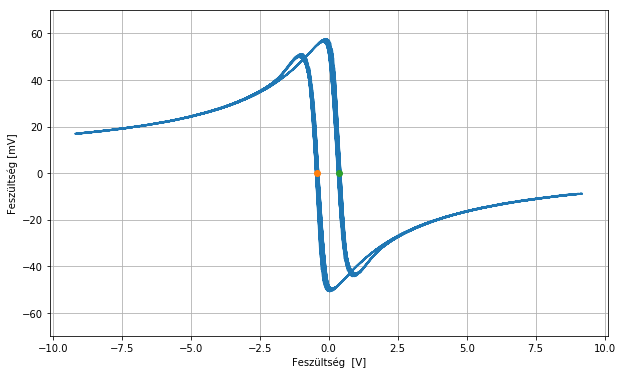

E:\marci main\bme\hfizlab2\01amr\3-15.txt
-0.222222222222 0.168498168498
0.39072039072


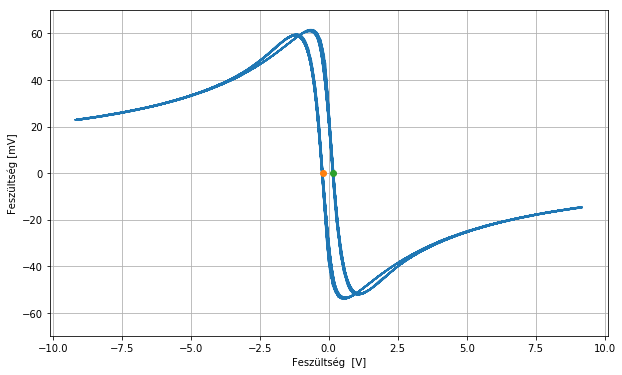

E:\marci main\bme\hfizlab2\01amr\3-20.txt
-0.197802197802 0.119658119658
0.31746031746000003


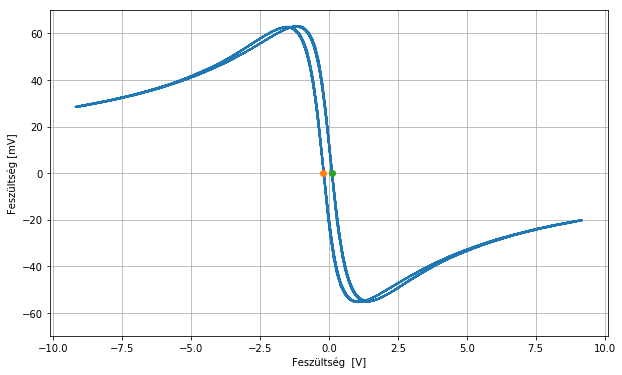

E:\marci main\bme\hfizlab2\01amr\3-25.txt
-0.173382173382 0.124542124542
0.297924297924


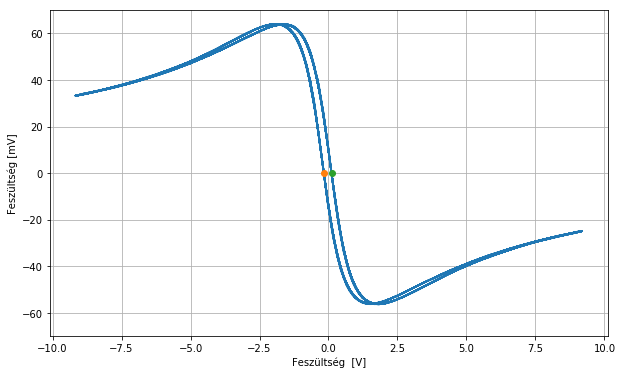

E:\marci main\bme\hfizlab2\01amr\3-30.txt
-0.17094017094 0.11477411477399999
0.285714285714


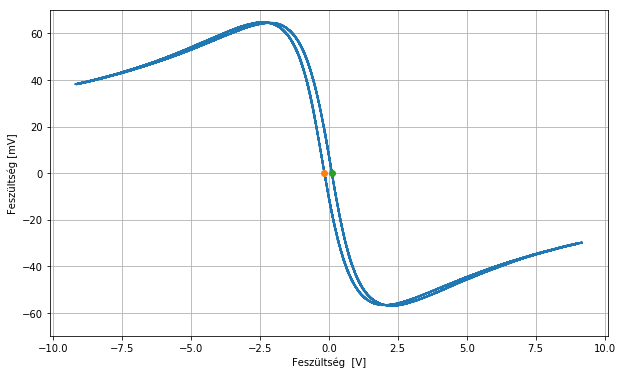

E:\marci main\bme\hfizlab2\01amr\3-35.txt
-0.09523809523804999 0.114774114774
0.21001221001205


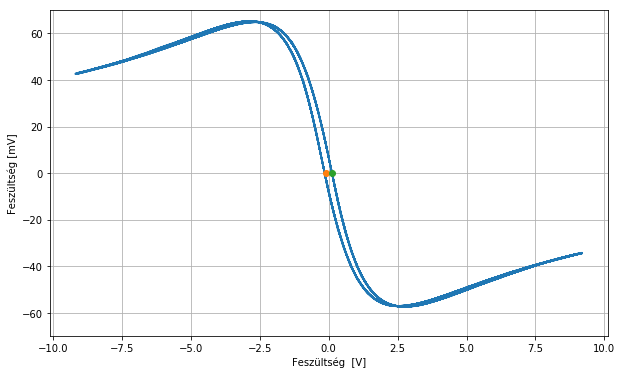

E:\marci main\bme\hfizlab2\01amr\3-40.txt
-0.13919413919399998 0.139194139194
0.27838827838799995


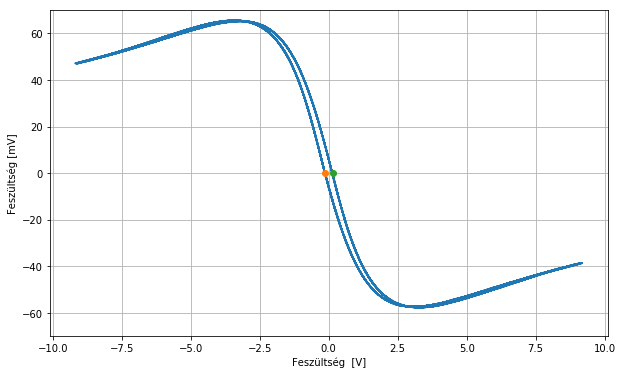

E:\marci main\bme\hfizlab2\01amr\3-45.txt
-0.09523809523804999 0.13431013431
0.22954822954805


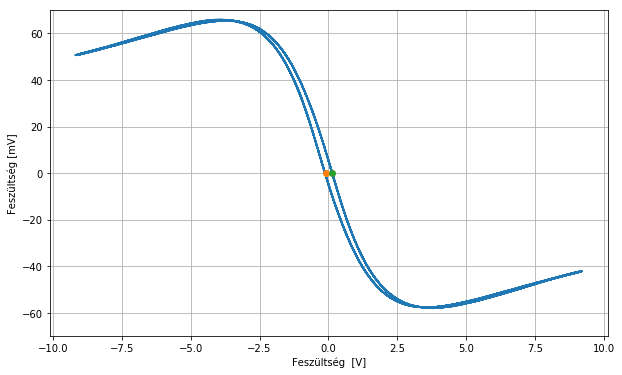

E:\marci main\bme\hfizlab2\01amr\3-50.txt
-0.10989010989 0.13431013431
0.2442002442


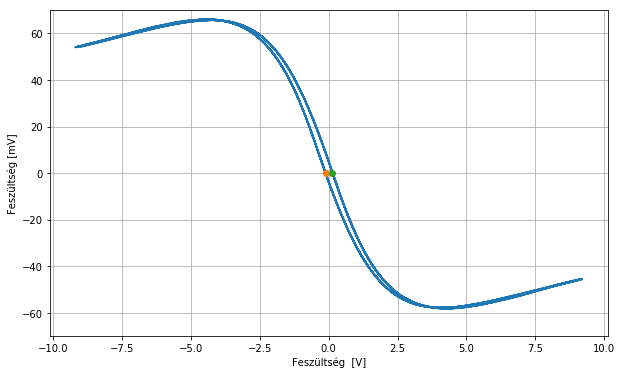

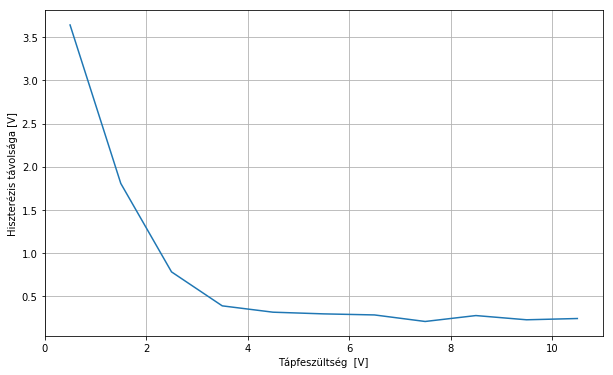

In [4]:
j=0
tap = []
hist = []
for filename in glob.glob(os.path.join(path, '3-*txt')):
    j=j+1
    print(filename)
    i=0
    tap.append(j*0.5)
    t = []
    v1 = []
    v2 = []
    v3 = []
    with open(filename) as f:
        j=j+1
        for line in f:
            i=i+1
            if i>7:
                try:
                    a = float(line.split("\t")[3])
                    #or cut in range(300):
                    #f abs(a)<0.8
                    t.append(float(line.split("\t")[0]))
                    v1.append(float(line.split("\t")[1]))
                    v2.append(float(line.split("\t")[2]))
                    v3.append(float(line.split("\t")[3]))
                except:
                    print("")

    v1 = list(v1 - offset)
    
    
    left0 = []
    right0 = []
    for k in range(len(t)):
        
        if abs(v1[k])<0.5 and v3[k]<0:
            left0.append(v3[k])
        if left0 == []:
            if abs(v1[k])<2.5 and v3[k]<0:
                left0.append(v3[k])
        if left0 == []:
            if abs(v1[k])<7 and v3[k]<0:
                left0.append(v3[k])
                
        if abs(v1[k])<0.5 and v3[k]>0:
            right0.append(v3[k])
        if right0 == []:
            if abs(v1[k])<2.5 and v3[k]>0 and v3[k]<5:
                right0.append(v3[k])
        if right0 == []:
            if abs(v1[k])<7 and v3[k]>0 and v3[k]<5:
                right0.append(v3[k])
                
    left = statistics.median(left0)
    right = statistics.median(right0)
    print(left,right)
    print(right-left)
    hist.append(right-left)
    
    plt.figure(figsize=(10,6))
    plt.plot(v3,v1)
    plt.plot(left,0,'o',right,0,'o')
    plt.ylabel("Feszültség [mV]")
    plt.xlabel("Feszültség  [V]")
    plt.ylim(-70,70)
    #plt.xlim(-1.70,1.70)
    plt.grid(True)
    plt.savefig(filename[:-4]+".pdf")
    plt.show()

plt.figure(figsize=(10,6))
plt.plot(tap,hist)
plt.ylabel("Hiszterézis távolsága [V]")
plt.xlabel("Tápfeszültség  [V]")
plt.grid(True)
plt.savefig("3-hist.pdf")
plt.show()

4. feladat

In [9]:
j=0
deg = []
d1 = []
d2 = []
for filename in glob.glob(os.path.join(path, '4-*txt')):
    j=j+1
    print(filename)
    i=0
    tap.append(j*0.5)
    t = []
    v1 = []
    v2 = []
    v3 = []
    with open(filename) as f:
        j=j+1
        for line in f:
            i=i+1
            if i>7:
                try:
                    a = float(line.split("\t")[3])
                    #or cut in range(300):
                    #f abs(a)<0.8
                    t.append(float(line.split("\t")[0]))
                    v1.append(float(line.split("\t")[1]))
                    v2.append(float(line.split("\t")[2]))
                    v3.append(float(line.split("\t")[3]))
                except:
                    print("")

    deg.append(j*5-5)
    #plt.figure(figsize=(10,6))
    #plt.plot(v1,v2)
    #plt.plot(t,v1,t,v2)
    #plt.hist(v1,bins = 50)
    
    v1.sort()
    d1.append(v1[int(3*len(v1)/4)]-v1[int(len(v1)/4)])
    v2.sort()
    d2.append(v2[int(3*len(v2)/4)]-v2[int(len(v2)/4)])
    
    #plt.ylabel("Feszültség [mV]")
    #plt.xlabel("Feszültség  [V]")
    #plt.ylim(-70,70)
    #plt.xlim(-1.70,1.70)
    #plt.grid(True)
    #plt.savefig(filename[:-4]+".pdf")
    #plt.show()


E:\marci main\bme\hfizlab2\01amr\4-00.txt
E:\marci main\bme\hfizlab2\01amr\4-01.txt
E:\marci main\bme\hfizlab2\01amr\4-02.txt
E:\marci main\bme\hfizlab2\01amr\4-03.txt
E:\marci main\bme\hfizlab2\01amr\4-04.txt
E:\marci main\bme\hfizlab2\01amr\4-05.txt
E:\marci main\bme\hfizlab2\01amr\4-06.txt
E:\marci main\bme\hfizlab2\01amr\4-07.txt
E:\marci main\bme\hfizlab2\01amr\4-08.txt
E:\marci main\bme\hfizlab2\01amr\4-09.txt
E:\marci main\bme\hfizlab2\01amr\4-10.txt
E:\marci main\bme\hfizlab2\01amr\4-11.txt
E:\marci main\bme\hfizlab2\01amr\4-12.txt
E:\marci main\bme\hfizlab2\01amr\4-13.txt
E:\marci main\bme\hfizlab2\01amr\4-14.txt
E:\marci main\bme\hfizlab2\01amr\4-15.txt
E:\marci main\bme\hfizlab2\01amr\4-16.txt
E:\marci main\bme\hfizlab2\01amr\4-17.txt
E:\marci main\bme\hfizlab2\01amr\4-18.txt
E:\marci main\bme\hfizlab2\01amr\4-19.txt
E:\marci main\bme\hfizlab2\01amr\4-20.txt
E:\marci main\bme\hfizlab2\01amr\4-21.txt
E:\marci main\bme\hfizlab2\01amr\4-22.txt
E:\marci main\bme\hfizlab2\01amr\4

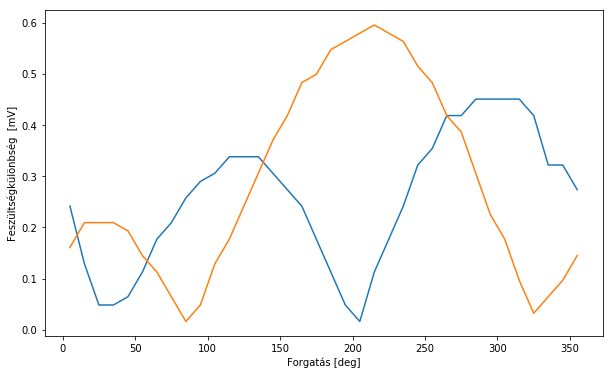

In [10]:
plt.figure(figsize=(10,6))
plt.ylabel("Feszültségkülönbség  [mV]")
plt.xlabel("Forgatás [deg]")
plt.plot(deg,d2)
plt.plot(deg,d1)
plt.savefig("4.pdf")
plt.show()